**Question 1: Import numpy, pandas, visualization libraries.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import numpy
from numpy import median

**Question 2: Create timer and include time measure for all questions from Part II.**

In [2]:
import time
class Timer(object):
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        self.start_time = time.time()

    def stop(self):
        self.times.append(time.time() - self.start_time)
        return self.times[-1]

**Question 3: Read in three csv files and print first five lines of each of them.**

In [11]:
timer = Timer()
timer.start()
mylist = []
dataLarge = pd.read_csv("data_large.csv")
dataMedium = pd.read_csv("data_medium.csv")
dataSmall = pd.read_csv("data_small.csv")
print('Time to read 3 files is %.5f sec' % timer.stop())

Time to read 3 files is 93.91937 sec


In [7]:
print(dataLarge)

In [5]:
dataMedium.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-02-18 08:57:09,2016-02-18 09:11:37,1,1.95,1,11.5,0.0,0.5,2.46,0.0,0.3,14.76
1,1,2016-03-10 14:12:32,2016-03-10 14:16:26,1,0.60,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30
2,1,2016-02-06 06:48:40,2016-02-06 06:58:14,1,3.00,2,11.0,0.0,0.5,0.00,0.0,0.3,11.80
3,2,2016-03-10 16:31:22,2016-03-10 16:41:44,4,1.25,2,8.0,1.0,0.5,0.00,0.0,0.3,9.80
4,2,2016-03-01 20:58:57,2016-03-01 21:04:09,1,1.49,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80


In [6]:
dataSmall.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-03-29 07:54:27,2016-03-29 08:01:58,2,1.31,1,7.0,0.0,0.5,1.56,0.0,0.3,9.36
1,2,2016-02-18 10:33:03,2016-02-18 10:37:17,1,0.97,1,5.5,0.0,0.5,1.26,0.0,0.3,7.56
2,1,2016-03-17 11:30:47,2016-03-17 11:46:40,1,2.10,2,11.5,0.0,0.5,0.00,0.0,0.3,12.30
3,1,2016-03-26 19:49:01,2016-03-26 20:01:30,4,1.60,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30
4,1,2016-02-12 21:42:23,2016-02-12 21:48:37,1,1.10,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30


**Question 4: Code the function to calculate how many passengers pay through each type of payment types.**

In [7]:
def questionFour(data):
    timer = Timer()
    timer.start()
    temp = data['payment_type'].values.tolist()
    paymentType = set(temp)
    #print(paymentType)
    count = 0
    result = []
    for i in paymentType:
        for j in temp:
            if i == j:
                count += 1
        result.append(count)
        count = 0
    paymentType = list(paymentType)
    print('Time to exec func %.5f sec:' % timer.stop())
    for i in range(len(paymentType)):
        print('there was/were',result[i],'passenger choosing the',paymentType[i],'payment method')
    

In [8]:
questionFour(dataSmall)

Time to exec func 0.00200 sec:
there was/were 6718 passenger choosing the 1 payment method
there was/were 3235 passenger choosing the 2 payment method
there was/were 32 passenger choosing the 3 payment method
there was/were 15 passenger choosing the 4 payment method


In [9]:
questionFour(dataMedium)

Time to exec func 0.10102 sec:
there was/were 669824 passenger choosing the 1 payment method
there was/were 325150 passenger choosing the 2 payment method
there was/were 3654 passenger choosing the 3 payment method
there was/were 1372 passenger choosing the 4 payment method


In [10]:
questionFour(dataLarge)

Time to exec func 2.34470 sec:
there was/were 15807750 passenger choosing the 1 payment method
there was/were 7667443 passenger choosing the 2 payment method
there was/were 87187 passenger choosing the 3 payment method
there was/were 30621 passenger choosing the 4 payment method


**Question 5: Code function to find min, max, mean of the cost for 1 trips on the given day of the specific month (only use the dropoff time).**

In [11]:
timer = Timer()
timer.start()
def get_date_info(df):
    df['year'] = df['tpep_dropoff_datetime'].dt.year
    df['month'] = df['tpep_dropoff_datetime'].dt.month
    df['day'] = df['tpep_dropoff_datetime'].dt.day
    #df['hour'] = df['tpep_dropoff_datetime'].dt.hour
    df['time'] = df['tpep_dropoff_datetime'].dt.time
    return(df)

dataSmall['tpep_dropoff_datetime'] = pd.to_datetime(dataSmall['tpep_dropoff_datetime'])
dataSmall = get_date_info(dataSmall)

dataMedium['tpep_dropoff_datetime'] = pd.to_datetime(dataMedium['tpep_dropoff_datetime'])
dataMedium = get_date_info(dataMedium)

dataLarge['tpep_dropoff_datetime'] = pd.to_datetime(dataLarge['tpep_dropoff_datetime'])
dataLarge = get_date_info(dataLarge)

print('Time to create new time columns %.5f sec' % timer.stop())

Time to create new time columns 32.40892 sec


In [12]:
def subsetDayAndMonth(d,m,data):
    df = pd.DataFrame()
    df['cost'] = data['total_amount'][(data['month'] == m) & (data['day'] == d)]
    return df

In [13]:
def questionFive(data):
    timer = Timer()
    m = int(input('Which month you want to choose, Feb or Mar? Input a number: '))
    d = int(input('Input a day: '))
    timer.start()
    df1 = subsetDayAndMonth(d,m,data).reset_index(drop=True, inplace=False)
    costList = df1['cost'].values.tolist()
    minCost = costList[0]
    maxCost = costList[0]
    meanCost = 0
    for i in costList:
        if (minCost > i): minCost = i
        if (maxCost < i): maxCost = i
        meanCost += i 
    meanCost = meanCost/len(costList)
    givenDate = str(d)+'/'+str(m)+':'
    print('Time to exec func %.5f sec:' % timer.stop())
    print('On the day',givenDate)
    print('     - the min cost is',minCost)
    print('     - the mean cost is',meanCost)
    print('     - the max cost is',maxCost)
        

In [14]:
questionFive(dataSmall)

In [ ]:
questionFive(dataMedium)

Time to exec func 0.03000 sec:
On the day 2/3:
     - the min cost is -57.3
     - the mean cost is 15.725135197195861
     - the max cost is 290.39


In [ ]:
questionFive(dataLarge)

Time to exec func 0.27106 sec:
On the day 2/3:
     - the min cost is -110.64
     - the mean cost is 15.658471130034336
     - the max cost is 934.37


**Question 6: Code the function to count how many trips that drop off at the midnight (11 PM to 1 AM) on the given day of the specific month.**

In [ ]:
midnight_bg = datetime.time(23,0,0)
midnight_end = datetime.time(1,0,0) 

In [ ]:
def questionSix(data):
    timer = Timer()
    m = int(input('Which month you want to choose, Feb or Mar? Input a number: '))
    d = int(input('Input a day: '))
    timer.start()
    subset = pd.DataFrame()
    subset['time'] = data['time'][(data['month'] == m) & (data['day'] == d) & ((data['time'] <= midnight_end) | (data['time'] >= midnight_bg))]
    date = str(d)+'/'+str(m)
    print('Time to exec func %.5f sec:' % timer.stop())
    print('there was/were',len(subset['time']),'trip(s) that drop off at midnight on',date)

In [ ]:
questionSix(dataSmall)

Time to exec func 0.00600 sec:
there was/were 17 trip(s) that drop off at midnight on 2/3


In [ ]:
questionSix(dataMedium)

Time to exec func 0.09703 sec:
there was/were 1320 trip(s) that drop off at midnight on 2/3


In [ ]:
questionSix(dataLarge)

Time to exec func 1.83380 sec:
there was/were 29977 trip(s) that drop off at midnight on 2/3


**Question 7: Write your own ascending sort function and sort values in fare_amount column on the given day of the specific month then display the negative amount payment and count how many values under 10$.**

In [ ]:
def quick_sort(array, start, end):
    if (start <= end):
        key = array[(start+end)//2]
        i = start 
        j = end
        while (i<=j):
            while (array[i] < key): i+=1
            while (array[j] > key): j-=1
            if (i<=j):  
                array[i],array[j] = array[j],array[i]
                i+=1
                j-=1
        if (start < j): quick_sort(array,start,j)
        if (end > i): quick_sort(array,i,end)

In [ ]:
def questionSeven(data):
    timer = Timer()
    m = int(input('Which month you want to choose, Feb or Mar? Input a number: '))
    d = int(input('Input a day: '))
    timer.start()
    newArray = data['fare_amount'][(data['month'] == m) & (data['day'] == d)].values.tolist()
    quick_sort(newArray,0,len(newArray)-1)
    neg = []
    for i in newArray:
        if i < 0:
            neg.append(i)
    count = 0
    for i in newArray:
        if i < 10: 
            count += 1
    print('Time to exec func %.5f sec:' % timer.stop())
    givenDate = str(d)+'/'+str(m)+':'
    print('On the day',givenDate)
    print('The number of negative amount payment is/are',neg if len(neg)>0 else '0')
    print('The was/were',count,'/',len(newArray),'value(s) under 10$')

In [ ]:
questionSeven(dataSmall)

Time to exec func 0.00200 sec:
On the day 2/3:
The number of negative amount payment is/are 0
The was/were 106 / 181 value(s) under 10$


In [ ]:
questionSeven(dataMedium)

Time to exec func 0.04402 sec:
On the day 2/3:
The number of negative amount payment is/are [-52.0, -4.5, -3.5, -3.5, -3.0, -2.5, -2.5, -2.5]
The was/were 9372 / 17419 value(s) under 10$


In [ ]:
questionSeven(dataLarge)

Time to exec func 1.05176 sec:
On the day 2/3:
The number of negative amount payment is/are [-93.8, -52.0, -52.0, -52.0, -52.0, -52.0, -52.0, -52.0, -52.0, -29.3, -26.3, -20.0, -20.0, -20.0, -15.3, -10.5, -7.0, -7.0, -7.0, -6.5, -6.5, -6.5, -6.5, -6.5, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -5.5, -5.5, -5.5, -5.5, -5.5, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5]
The was/w

**Question 8: Code the function to search and return number of passengers that tip drivers in four levels (no tips, under 3$, between 3$ and 5$, above 5$) and display the highest tip amount.**

In [ ]:
tipLevels = {'no tips':0,'under 3$':0, 'bw 3$ and 5$':0,'above 5$':0}
def questionEight(data):
    timer = Timer()
    timer.start()
    tips = data['tip_amount'].values.tolist()
    maxTip = tips[0]
    for i in tips:
        if i == 0:
            tipLevels['no tips'] +=1
        else:
            if i < 3: tipLevels['under 3$'] += 1
            if 3 <= i <= 5: tipLevels['bw 3$ and 5$'] += 1
            if i > 5: tipLevels['above 5$'] += 1
        if maxTip < i:
            maxTip = i
    print('Time to exec func %.5f sec:' % timer.stop())
    print('there was/were',tipLevels['no tips'],'passenger(s) that do not give drive any tips')
    print('there was/were',tipLevels['under 3$'],'passenger(s) that give tips under 3$')
    print('there was/were',tipLevels['bw 3$ and 5$'],'passenger(s) that give tips between 3$ and 5$')
    print('there was/were',tipLevels['above 5$'],'passenger(s) that give tips above 5$')
    print('the highest tip is',maxTip)

In [ ]:
questionEight(dataSmall)

Time to exec func 0.00200 sec:
there was/were 3534 passenger(s) that do not give drive any tips
there was/were 4754 passenger(s) that give tips under 3$
there was/were 1075 passenger(s) that give tips between 3$ and 5$
there was/were 637 passenger(s) that give tips above 5$
the highest tip is 160.0


In [ ]:
questionEight(dataMedium)

Time to exec func 0.26506 sec:
there was/were 358360 passenger(s) that do not give drive any tips
there was/were 476575 passenger(s) that give tips under 3$
there was/were 109347 passenger(s) that give tips between 3$ and 5$
there was/were 65718 passenger(s) that give tips above 5$
the highest tip is 440.25


In [ ]:
questionEight(dataLarge)

Time to exec func 7.02422 sec:
there was/were 8726141 passenger(s) that do not give drive any tips
there was/were 11604148 passenger(s) that give tips under 3$
there was/were 2672374 passenger(s) that give tips between 3$ and 5$
there was/were 1600338 passenger(s) that give tips above 5$
the highest tip is 850.0


**Question 9: Code the function to find the three longest trips (longest durations) on the given day of the specific month and calculate their average velocity (m/s).**

In [ ]:
def questionNine(data):
    timer = Timer()
    m = int(input('Which month you want to choose, Feb or Mar? Input a number: '))
    d = int(input('Input a day: '))
    timer.start()
    df3 = pd.DataFrame()
    df3 = data[(data['month'] == m) & (data['day'] == d)].reset_index(drop=True)
    duration = []
    df3['time'] = pd.to_datetime(df3['tpep_dropoff_datetime']) - pd.to_datetime(df3['tpep_pickup_datetime'])
    for i in df3['time']:
        duration.append(i.seconds)
    df3['duration (seconds)'] = duration
    df3['average velocity (km/h)'] = round(3.6*(df3['trip_distance']*1000/df3['duration (seconds)']),3)
    df3 = df3.sort_values('duration (seconds)',ascending=False).reset_index(drop=True)
    print('Time to exec func %.5f sec:' % timer.stop())
    print('the three logest trip are')
    start = 0
    for i in  df3['trip_distance']:
        if i == 0.00: start += 1
        else: break
    result = df3[['duration (seconds)','average velocity (km/h)']][start:start+3]
    return result

In [ ]:
questionNine(dataSmall)

Time to exec func 0.06822 sec:
the three logest trip are


,duration (seconds),average velocity (km/h)
0,3339,53.908
1,3251,19.822
2,2866,22.635


In [ ]:
questionNine(dataMedium)

Time to exec func 0.54504 sec:
the three logest trip are


,duration (seconds),average velocity (km/h)
0,86321,0.304
1,86284,0.026
2,86272,0.256


In [ ]:
questionNine(dataLarge)

Time to exec func 20.48018 sec:
the three logest trip are


,duration (seconds),average velocity (km/h)
0,86370,0.087
1,86362,0.075
2,86358,0.008


**Question 10: If the first day of the duration of this dataset (only use the dropoff time) was Monday, write a function to count number of trips on each weekday and then draw a chart to demonstrate them.**

In [ ]:
def questionTen(data):
    timer = Timer()
    timer.start()
    month = [0,31,29,31,30,31,30,31,31,30,31,30,31]
    subsetM = data['month'].values.tolist()
    subsetD = data['day'].values.tolist()
    week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    count = [0,0,0,0,0,0,0]
    firstMonth = 2
    firstDay = 1
    for i in range(len(subsetM)):
        if firstMonth == subsetM[i]:
            days = subsetD[i] - firstDay
        else:
            days = 0
            if subsetM[i] - firstMonth >1:
                for i in range(3,subsetM[i],1):
                    days += month[i]
            else:
                days = (28 + subsetD[i])%7
        if days%7 == 0: count[0] += 1
        if days%7 == 1: count[1] += 1
        if days%7 == 2: count[2] += 1
        if days%7 == 3: count[3] += 1
        if days%7 == 4: count[4] += 1
        if days%7 == 5: count[5] += 1
        if days%7 == 6: count[6] += 1
    df4 = pd.DataFrame()
    df4['Days of the week'] = week 
    df4['Number of trips'] = count
    plt.bar(week, count, color='green')
    plt.title('The number of trips in each day of the week')
    plt.xlabel('Days of the week')
    plt.ylabel('Number of trips')
    plt.show()
    print(df4)
    print('Time to exec func %.5f sec' % timer.stop())

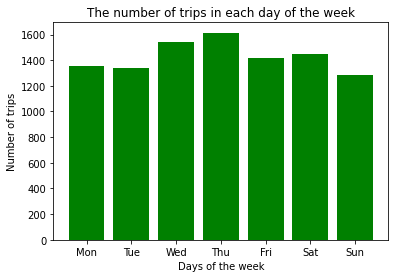

  Days of the week  Number of trips
0              Mon             1353
1              Tue             1341
2              Wed             1539
3              Thu             1614
4              Fri             1420
5              Sat             1451
6              Sun             1282
Time to exec func 0.13203 sec


In [ ]:
questionTen(dataSmall)

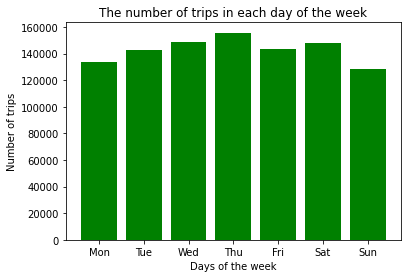

  Days of the week  Number of trips
0              Mon           133310
1              Tue           142545
2              Wed           148612
3              Thu           155643
4              Fri           143597
5              Sat           147555
6              Sun           128738
Time to exec func 0.45765 sec


In [ ]:
questionTen(dataMedium)

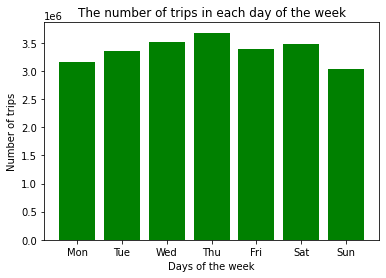

  Days of the week  Number of trips
0              Mon          3149378
1              Tue          3360695
2              Wed          3505083
3              Thu          3678257
4              Fri          3387869
5              Sat          3480724
6              Sun          3030995
Time to exec func 8.05428 sec


In [ ]:
questionTen(dataLarge)